# **Case Study: How Does a Bike-Share Navigate Speedy Success?**


## **Scenario:**
#### The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently.

**About the company:**

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why
casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

## Ask
Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

**Moreno has assigned you the first question to answer: How do annual members and casual riders use Cyclistic bikes
differently?**

You will produce a report with the following deliverables:
1. A clear statement of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top three recommendations based on your analysis

## Prepare
You will use Cyclistic’s historical trip data to analyze and identify trends. Download the previous 12 months of Cyclistic trip data here. (Note: The datasets have a different name because Cyclistic is a fictional company. For the purposes of this case study, the datasets are appropriate and will enable you to answer the business questions. The data has been made available by
Motivate International Inc. under this license.) This is public data that you can use to explore how different customer types are using Cyclistic bikes. But note that data-privacy issues prohibit you from using riders’ personally identifiable information. This means that you won’t be able to connect pass purchases to credit card numbers to determine if casual riders live in the
Cyclistic service area or if they have purchased multiple single passes.

## Analyze
Now that your data is stored appropriately and has been prepared for analysis, start putting it to work.

## **STEP 1:** installing packages:

In [ ]:
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("lubridate")

librarys that is going to be needed:

In [ ]:
library(tidyverse)
library(ggplot2)
library(lubridate)

## **STEP 2:** collecting data

importing data

In [3]:
bici_Q1 <- read.csv("Divvy_Trips_2019_Q1.csv")
bici_Q2 <- read.csv("Divvy_Trips_2019_Q2.csv")
bici_Q3 <- read.csv("Divvy_Trips_2019_Q3.csv")
bici_Q4 <- read.csv("Divvy_Trips_2019_Q4.csv")

visualizing data

In [4]:
print("column names Q1")
colnames(bici_Q1)
print("column names Q2")
colnames(bici_Q2)
print("column names Q3")
colnames(bici_Q3)
print("column names Q4")
colnames(bici_Q4)

[1] "column names Q1"


[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "column names Q2"


[1] "X01...Rental.Details.Rental.ID"                   
 [2] "X01...Rental.Details.Local.Start.Time"            
 [3] "X01...Rental.Details.Local.End.Time"              
 [4] "X01...Rental.Details.Bike.ID"                     
 [5] "X01...Rental.Details.Duration.In.Seconds.Uncapped"
 [6] "X03...Rental.Start.Station.ID"                    
 [7] "X03...Rental.Start.Station.Name"                  
 [8] "X02...Rental.End.Station.ID"                      
 [9] "X02...Rental.End.Station.Name"                    
[10] "User.Type"                                        
[11] "Member.Gender"                                    
[12] "X05...Member.Details.Member.Birthday.Year"

[1] "column names Q3"


[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "column names Q4"


[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

### *As we can see, Q2 has different column names, we are going to fix that:*





## **STEP 3:** transform data

In [ ]:
(bici_Q1 <- rename(bici_Q1,
                      ride_id = trip_id,
                      bike_id = bikeid,
                      trip_duration = tripduration,
                      user_type = usertype))
(bici_Q2 <- rename(bici_Q2,
                     ride_id = X01...Rental.Details.Rental.ID,
                     start_time = X01...Rental.Details.Local.Start.Time,
                     end_time = X01...Rental.Details.Local.End.Time,
                     bike_id = X01...Rental.Details.Bike.ID,
                     trip_duration = X01...Rental.Details.Duration.In.Seconds.Uncapped,
                     from_station_id = X03...Rental.Start.Station.ID,
                     from_station_name = X03...Rental.Start.Station.Name,
                     to_station_id = X02...Rental.End.Station.ID,
                     to_station_name = X02...Rental.End.Station.Name,
                     user_type = User.Type,
                     gender = Member.Gender,
                     birthyear = X05...Member.Details.Member.Birthday.Year))
(bici_Q3 <- rename(bici_Q3,
                      ride_id = trip_id,
                      bike_id = bikeid,
                      trip_duration = tripduration,
                      user_type = usertype))
(bici_Q4 <- rename(bici_Q4,
                      ride_id = trip_id,
                      bike_id = bikeid,
                      trip_duration = tripduration,
                      user_type = usertype))

visualizing data to see if now they match




In [6]:
print("column names Q1")
colnames(bici_Q1)
print("column names Q2")
colnames(bici_Q2)
print("column names Q3")
colnames(bici_Q3)
print("column names Q4")
colnames(bici_Q4)

[1] "column names Q1"


[1] "ride_id"           "start_time"        "end_time"         
 [4] "bike_id"           "trip_duration"     "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "user_type"         "gender"            "birthyear"

[1] "column names Q2"


[1] "ride_id"           "start_time"        "end_time"         
 [4] "bike_id"           "trip_duration"     "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "user_type"         "gender"            "birthyear"

[1] "column names Q3"


[1] "ride_id"           "start_time"        "end_time"         
 [4] "bike_id"           "trip_duration"     "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "user_type"         "gender"            "birthyear"

[1] "column names Q4"


[1] "ride_id"           "start_time"        "end_time"         
 [4] "bike_id"           "trip_duration"     "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "user_type"         "gender"            "birthyear"

stack individual quarters into one big data frame

In [7]:
bike_trips <- bind_rows(bici_Q1,bici_Q2,bici_Q3,bici_Q4)

## **STEP 4:** visualize new data frame

In [8]:
colnames(bike_trips) #show the column names
nrow(bike_trips) #show the number of rows
dim(bike_trips) #show the number of rows and columns
summary(bike_trips) #show statistical summary of data (only numerics)
str(bike_trips)

[1] "ride_id"           "start_time"        "end_time"         
 [4] "bike_id"           "trip_duration"     "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "user_type"         "gender"            "birthyear"

[1] 1423624

[1] 1423624      12

    ride_id          start_time          end_time            bike_id    
 Min.   :21742443   Length:1423624     Length:1423624     Min.   :   1  
 1st Qu.:22167772   Class :character   Class :character   1st Qu.:1739  
 Median :22586728   Mode  :character   Mode  :character   Median :3469  
 Mean   :22799394                                         Mean   :3401  
 3rd Qu.:23004866                                         3rd Qu.:5091  
 Max.   :25343058                                         Max.   :6471  
                                                          NA's   :1     
 trip_duration      from_station_id from_station_name  to_station_id  
 Length:1423624     Min.   :  1.0   Length:1423624     Min.   :  1.0  
 Class :character   1st Qu.: 77.0   Class :character   1st Qu.: 77.0  
 Mode  :character   Median :173.0   Mode  :character   Median :174.0  
                    Mean   :200.4                      Mean   :201.2  
                    3rd Qu.:289.0                      3rd Qu

'data.frame':	1423624 obs. of  12 variables:
 $ ride_id          : int  21742443 21742444 21742445 21742446 21742447 21742448 21742449 21742450 21742451 21742452 ...
 $ start_time       : chr  "2019-01-01 00:04:37" "2019-01-01 00:08:13" "2019-01-01 00:13:23" "2019-01-01 00:13:45" ...
 $ end_time         : chr  "2019-01-01 00:11:07" "2019-01-01 00:15:34" "2019-01-01 00:27:12" "2019-01-01 00:43:28" ...
 $ bike_id          : int  2167 4386 1524 252 1170 2437 2708 2796 6205 3939 ...
 $ trip_duration    : chr  "390.0" "441.0" "829.0" "1,783.0" ...
 $ from_station_id  : int  199 44 15 123 173 98 98 211 150 268 ...
 $ from_station_name: chr  "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ to_station_id    : int  84 624 644 176 35 49 49 142 148 141 ...
 $ to_station_name  : chr  "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ user_type        : chr  "Subscrib

Adding columns day, month, year

In [9]:
bike_trips$date <- as.Date(bike_trips$start_time)
bike_trips$month <- format(as.Date(bike_trips$date), "%m")
bike_trips$day <- format(as.Date(bike_trips$date), "%d")
bike_trips$year <- format(as.Date(bike_trips$date), "%Y")
bike_trips$day_of_week <- format(as.Date(bike_trips$date), "%A")

visulize the new columns

In [10]:
colnames(bike_trips)

[1] "ride_id"           "start_time"        "end_time"         
 [4] "bike_id"           "trip_duration"     "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "user_type"         "gender"            "birthyear"        
[13] "date"              "month"             "day"              
[16] "year"              "day_of_week"

Getting the time of each ride

In [11]:
bike_trips$start_time <- ymd_hms(bike_trips$start_time)
bike_trips$end_time <- ymd_hms(bike_trips$end_time)

Warning message:
“ 1 failed to parse.”


In [12]:
bike_trips$ride_length <- difftime(bike_trips$end_time, bike_trips$start_time)

converting ride_length to numeric

In [13]:
bike_trips$ride_length <- as.numeric(as.character(bike_trips$ride_length))
str(bike_trips)

'data.frame':	1423624 obs. of  18 variables:
 $ ride_id          : int  21742443 21742444 21742445 21742446 21742447 21742448 21742449 21742450 21742451 21742452 ...
 $ start_time       : POSIXct, format: "2019-01-01 00:04:37" "2019-01-01 00:08:13" ...
 $ end_time         : POSIXct, format: "2019-01-01 00:11:07" "2019-01-01 00:15:34" ...
 $ bike_id          : int  2167 4386 1524 252 1170 2437 2708 2796 6205 3939 ...
 $ trip_duration    : chr  "390.0" "441.0" "829.0" "1,783.0" ...
 $ from_station_id  : int  199 44 15 123 173 98 98 211 150 268 ...
 $ from_station_name: chr  "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ to_station_id    : int  84 624 644 176 35 49 49 142 148 141 ...
 $ to_station_name  : chr  "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ user_type        : chr  "Subscriber" "Subscriber" "Subscriber" "Subscriber" ...
 $ gender        

removing "Bad Data", the negatives and when the bike was only taken out for quality

In [14]:
bike_trips <- bike_trips[!(bike_trips$from_station_name == "HQ QR" |
                               bike_trips$ride_length < 0),]

transforming day of week from spanish to english

In [15]:
bike_trips <- bike_trips %>%
  mutate(day_of_week = recode(day_of_week,
                              "domingo" = "Sunday",
                              "lunes" = "Monday",
                              "martes" = "Tuesday",
                              "miércoles" = "Wednesday",
                              "jueves" = "Thursday",
                              "viernes" = "Friday",
                              "sábado" = "Saturday"))

## **STEP 5:** Analysis

analysis on ride_length

In [16]:
summary(bike_trips$ride_length)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
     1.02      6.50     11.10     21.22     20.07 177200.37         1 

comparison Subscriber vs. Customer by ride_length

In [26]:
bike_trips <- bike_trips %>%
  mutate(user_type = recode(user_type,
                            "Custumer" = "Customer",
                            "Subscri" = "Subscriber"))

In [27]:
print("====> AVERAGE <====")
aggregate(bike_trips$ride_length ~ bike_trips$user_type, FUN = mean)
print("====> MEDIAN <====")
aggregate(bike_trips$ride_length ~ bike_trips$user_type, FUN = median)
print("====> MAX <====")
aggregate(bike_trips$ride_length ~ bike_trips$user_type, FUN = max)
print("====> MIN <====")
aggregate(bike_trips$ride_length ~ bike_trips$user_type, FUN = min)


[1] "====> AVERAGE <===="


bike_trips$user_type,bike_trips$ride_length
<chr>,<dbl>
Customer,52.87953
Subscriber,13.90415


[1] "====> MEDIAN <===="


bike_trips$user_type,bike_trips$ride_length
<chr>,<dbl>
Customer,26.833333
Subscriber,9.483333


[1] "====> MAX <===="


bike_trips$user_type,bike_trips$ride_length
<chr>,<dbl>
Customer,177200.4
Subscriber,101607.1


[1] "====> MIN <===="


bike_trips$user_type,bike_trips$ride_length
<chr>,<dbl>
Customer,1.016667
Subscriber,1.016667


average ride_length by each day for Subscriber vs. Customer

In [28]:
aggregate(ride_length ~ user_type + day_of_week, data = bike_trips,
          FUN = mean)

user_type,day_of_week,ride_length
<chr>,<chr>,<dbl>
Customer,Friday,53.95632
Subscriber,Friday,13.63973
Customer,Monday,44.01760
Subscriber,Monday,14.16801
Customer,Saturday,53.21835
Subscriber,Saturday,15.53885
Customer,Sunday,49.78904
Subscriber,Sunday,15.99974
Customer,Thursday,56.37257


ordering the days of the week

In [29]:
bike_trips$day_of_week <- ordered(bike_trips$day_of_week,
                                    level=c("Sunday","Monday", "Tuesday",
                                            "Wednesday", "Thursday", "Friday",
                                            "Saturday"))

lets drop out na and empty rows

In [30]:
bike_trips <- subset(bike_trips, user_type != "")

now let's run again the code to see if it worked

In [31]:
aggregate(ride_length ~ user_type + day_of_week, data = bike_trips,
          FUN = mean)

user_type,day_of_week,ride_length
<chr>,<ord>,<dbl>
Customer,Sunday,49.78904
Subscriber,Sunday,15.99974
Customer,Monday,44.01760
Subscriber,Monday,14.16801
Customer,Tuesday,56.08842
Subscriber,Tuesday,13.41938
Customer,Wednesday,59.01896
Subscriber,Wednesday,13.22730
Customer,Thursday,56.37257


let's make a table about the numbers of ride and average duration between customer vs. subscriber

In [32]:
bike_trips %>%
  mutate(weekday = wday(start_time, label=TRUE)) %>%
  group_by(user_type, weekday) %>%
  drop_na() %>%
  summarise(rides_number = n(),
            avg_duration = mean(ride_length)) %>%
  arrange(user_type, weekday)

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


user_type,weekday,rides_number,avg_duration
<chr>,<ord>,<int>,<dbl>
Customer,Sun,15285,41.05570
Customer,Mon,11278,43.14198
Customer,Tue,9953,49.31286
Customer,Wed,9832,39.51078
Customer,Thu,11732,40.32451
Customer,Fri,12409,58.49054
Customer,Sat,16018,41.76479
Subscriber,Sun,88905,15.97866
Subscriber,Mon,176719,14.15854


visualization to see better about the numbers of ride and average duration between customer vs. subscriber

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


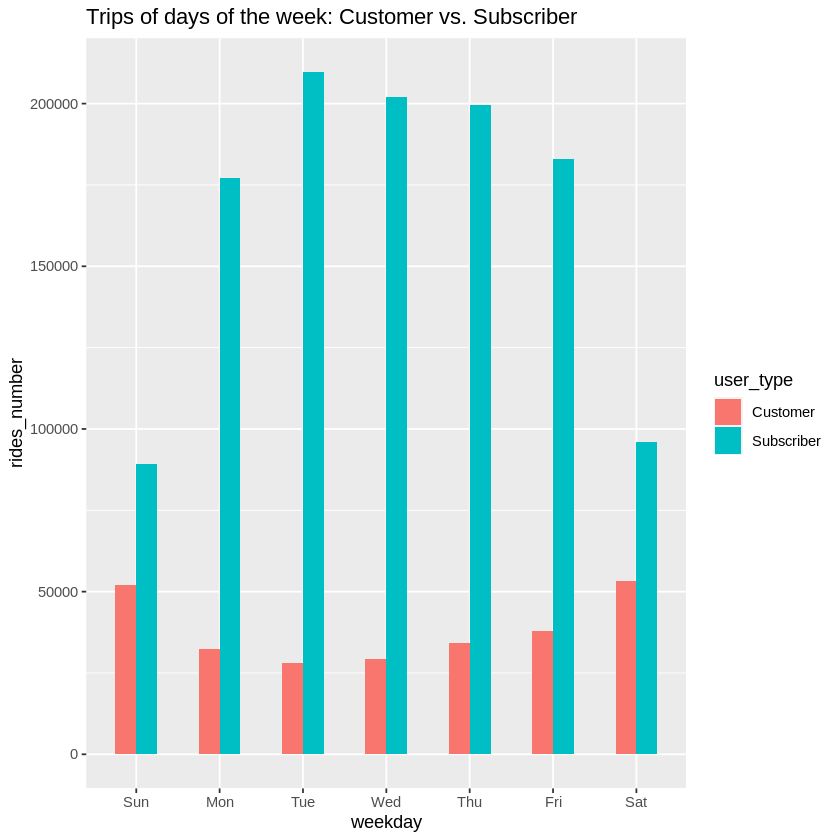

In [33]:
bike_trips %>%
  mutate(weekday = wday(start_time, label=TRUE)) %>%
  group_by(user_type, weekday) %>%
  summarise(rides_number = n(),
            avg_duration = mean(ride_length)) %>%
  arrange(user_type, weekday) %>%
  drop_na() %>%
  ggplot(aes(x=weekday, y=rides_number, fill=user_type)) +
  labs(title = "Trips of days of the week: Customer vs. Subscriber") +
  geom_col(width = 0.5, position = position_dodge(width = 0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

now lets make about trip_duration

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


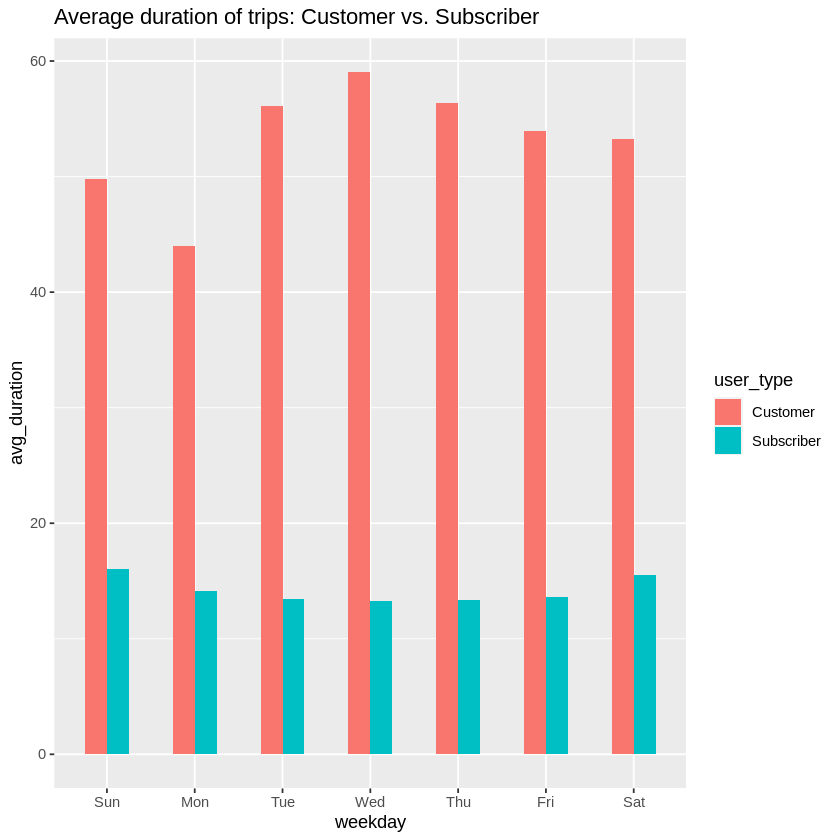

In [34]:
bike_trips %>%
  mutate(weekday = wday(start_time, label = TRUE)) %>%
  group_by(user_type, weekday) %>%
  summarise(rides_number = n(),
            avg_duration = mean(ride_length)) %>%
  drop_na() %>%
  arrange(user_type, weekday) %>%
  ggplot(aes(x=weekday, y=avg_duration, fill=user_type)) +
  labs(title = "Average duration of trips: Customer vs. Subscriber") +
  geom_col(width = 0.5, position = position_dodge(width = 0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

now lets see in months

## Share
Now that you have performed your analysis and gained some insights into your data, create visualizations to share your findings. Moreno has reminded you that they should be sophisticated and polished in order to effectively communicate to the executive team

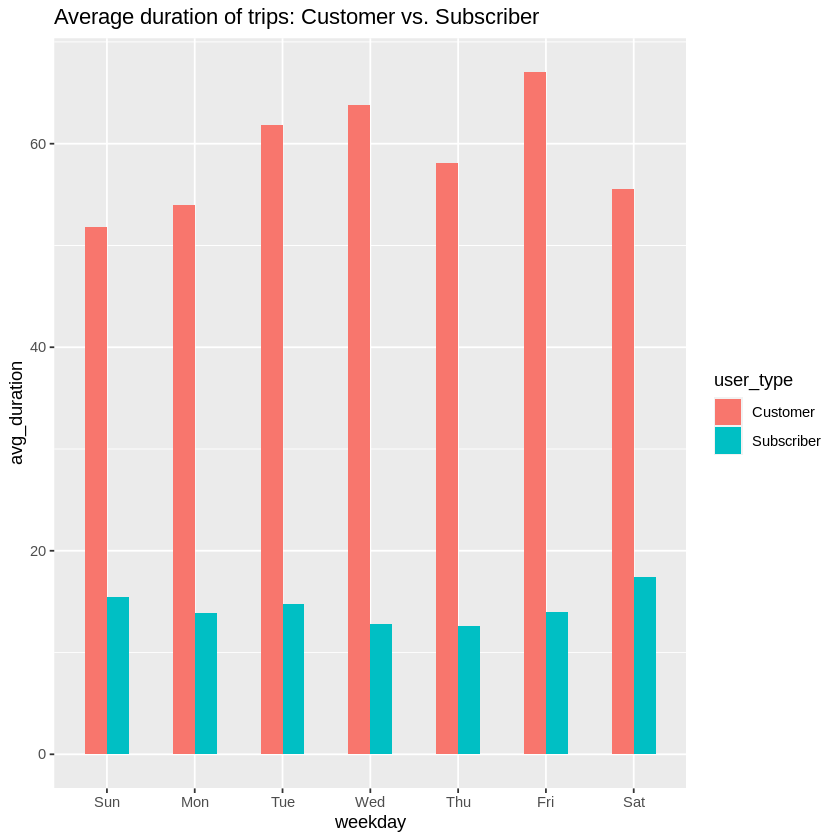

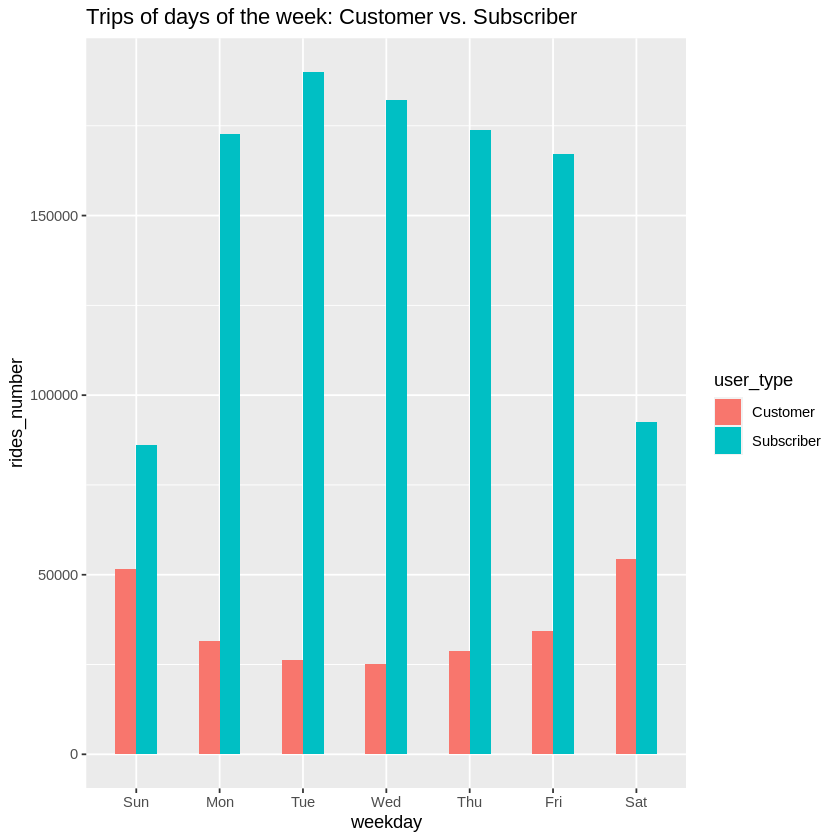

## Insights
How do annual members and casual riders use Cyclistic bikes differently?

*   **Graphic 1** -> as we can see, Customers (non subscribers) has an average time of 50min up to 60min of rides. That's almost the triple of time that Subscribers has.

  **Customers ->** 50 to 60 minutes ride
  
  **Subscribers ->** 10 to 15 minutes ride
  
*   **Graphic 2 ->** in the second graphic we see that Subscriber has a lot more number of trips then Customers.

  **Customers ->** around 50.000 rides on weekends and during the week this numbers decay in half.
  
  **Subscribers ->** in other hand, the subscribers has less rides on weekends, but still is more then customers, they have around 80.000 rides on weekends and on week day around 175.000 rides



## Recomendations

Even though Subscriber has a lot more rides then Customers, the Customers uses the bike more time then Subscriber during weekends.



*   Make offer for Customers to become Subscribers during the weekends, since its when he have more Customers.
*   Offer a discount to new Subscribers and offer them first year clear of membership fee

